Практическое задание 6

КМБО-06-20, Бундуки Владислав, Вариант 4

Тема: "Популярные деревья в районах Нью-Йорка"

Исходные данные:
1)Набор данных - https://www.kaggle.com/new-york-city/ny-2015-street-tree-census-tree-data?select=2015-street-tree-census-tree-data.csv

 
Задачи:

1)Выделить районы, в которых состояние деревьев аномально хорошее или плохое;

2)Выделить наилучший район по состоянию деревьев;

3)Выделить виды деревьев (или более общие элементы классификации), обладающие наилучшими показателями «здоровья»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # библиотека для визуализации
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('2015-street-tree-census-tree-data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

Нормируем числовые признаки и обрабатываем категориальные признаки:

In [3]:
import math
arr = ['block_id','tree_dbh','stump_diam','postcode','community board','cncldist','st_assem','st_senate','latitude','longitude','x_sp','y_sp']
for column in arr:
    data[column] = (data[column] - data[column].mean())/(math.sqrt(data[column].var()))
    
data['state'] = np.where(data['state'] == 'New York', 1, 0)

#Расположено ли дерево вдоль бордюра или со смещением от него
data['curb_loc'] = np.where(data['curb_loc'] == 'OnCurb', 1, 0)

#Повреждение тратуара в непосредственной близости от дерева
data['sidewalk'] = np.where(data['sidewalk'] == 'Damage', 1, 0)

#Указывает на наличие проблемы с корнями, вызванной брусчаткой в ложе дерева
data['root_stone'] = np.where(data['root_stone'] == 'Yes', 1, 0)

#Указывает на наличие проблемы с корнями, вызванной металлическими решетками в ложе дерева
data['root_grate'] = np.where(data['root_grate'] == 'Yes', 1, 0)

#Указывает на наличие других корневых проблем
data['root_other'] = np.where(data['root_other'] == 'Yes', 1, 0)

#Указывает на наличие проблемы со стволом, вызванной проволокой или веревкой, обмотанной вокруг ствола
data['trunk_wire'] = np.where(data['trunk_wire'] == 'Yes', 1, 0)

#Указывает на наличие проблем со стволом, вызванных установленным на дереве освещением
data['trnk_light'] = np.where(data['trnk_light'] == 'Yes', 1, 0)

#Указывает на наличие других проблем с магистралью
data['trnk_other'] = np.where(data['trnk_other'] == 'Yes', 1, 0)

#Указывает на наличие проблемы с ветвями, вызванной светильниками (обычно струнными) или проводами в ветвях
data['brch_light'] = np.where(data['brch_light'] == 'Yes', 1, 0)

#Указывает на наличие проблемы с ветками, вызванной кроссовками в ветках
data['brch_shoe'] = np.where(data['brch_shoe'] == 'Yes', 1, 0)

#Указывает на наличие других проблем с ветвями
data['brch_other'] = np.where(data['brch_other'] == 'Yes', 1, 0)

#Город, полученный из почтового индекса
my_set = set(data.zip_city)
i = 0
for item in my_set:
    data['zip_city'] = data['zip_city'].replace(item, i)
    i = i + 1

#Это название NTA, соответствующее области табуляции района по переписи населения США 2010 года, в которую попадает точка дерева
my_set = set(data.nta_name)
i = 0
for item in my_set:
    data['nta_name'] = data['nta_name'].replace(item, i)
    i = i + 1

#Это код NTA, соответствующий району, в который попадает точка дерева, согласно переписи населения США 2010 года.
my_set = set(data.nta)
i = 0
for item in my_set:
    data['nta'] = data['nta'].replace(item, i)
    i = i + 1

#Название района, в котором находится точка произрастания деревьев
my_set = set(data.borough)
i = 0
for item in my_set:
    data['borough'] = data['borough'].replace(item, i)
    i = i + 1

#Город, полученный из почтового индекса. Часто (но не всегда) это то же самое, что и район.
my_set = set(data.postcode)
i = 0
for item in my_set:
    data['postcode'] = data['postcode'].replace(item, i)
    i = i + 1

#Указывает, присутствует ли ограждение, и считает ли пользователь, что это полезное или вредное ограждение. Не регистрируется для мертвых деревьев и пней.
my_set = set(data.guards)
i = 0
for item in my_set:
    data['guards'] = data['guards'].replace(item, i)
    i = i + 1

#Это поле описывает категорию пользователя, который собрал данные этой точки дерева.
my_set = set(data.user_type)
i = 0
for item in my_set:
    data['user_type'] = data['user_type'].replace(item, i)
    i = i + 1    
    
#Указывает количество уникальных признаков бережного отношения, отмеченных для данного дерева. Не регистрируется для пней или мертвых деревьев.
my_set = set(data.steward)
i = 0
for item in my_set:
    data['steward'] = data['steward'].replace(item, i)
    i = i + 1

#Общее название вида, например, "красный клен"
my_set = set(data.spc_common)
i = 0
for item in my_set:
    data['spc_common'] = data['spc_common'].replace(item, i)
    i = i + 1
    
#Научное название вида, например, "Acer rubrum".
my_set = set(data.spc_latin)
i = 0
for item in my_set:
    data['spc_latin'] = data['spc_latin'].replace(item, i)
    i = i + 1


#Здоровье деревьев    
my_set = set(data.health)
i = 0
for item in my_set:
    data['health'] = data['health'].replace(item, i)
    i = i + 1    
    
data.loc[data.health == 'NaN', 'health'] = 0      
data.loc[data.health == 0, 'health'] = 3       
    
#Указывает, является ли дерево живым, стоящим мертвым или пнем.
data.loc[data.status == 'Alive', 'status'] = 2
data.loc[data.status == 'Stump', 'status'] = 1
data.loc[data.status == 'Dead', 'status'] = 0

data.loc[data.spc_latin == 'NaN', 'spc_latin'] = 0
data.loc[data.spc_common == 'NaN', 'spc_common'] = 0
data.loc[data.steward == 'NaN', 'steward'] = 0
data.loc[data.guards == 'NaN', 'guards'] = 0
data.loc[data.sidewalk == 'NaN', 'sidewalk'] = 0

In [4]:
#исключим столбец с уникальными значениями: tree_id
data = data.drop('tree_id', axis = 1)

#исключим столбец, включающий результаты других столбцов
data = data.drop('problems', axis = 1)

#исключим столбец с индивидуальными параметрами
data = data.drop('created_at', axis = 1)

#исключим столбец с индивидуальными параметрами
data = data.drop('address', axis = 1)

#исключим столбцы с признаками, которые отсутствуют в документации
data = data.drop('council district', axis = 1)
data = data.drop('census tract', axis = 1)
data = data.drop('bin', axis = 1)
data = data.drop('bbl', axis = 1)

In [5]:
#Создадим новый признак - problems {тип: число}, состоит из суммы положительных ответов о проблемах корней 
#Чем больше значение problems - тем состояние дерева хуже

data['problems'] = (data['root_stone'] + data['root_grate'] + data['root_other'] + data['trunk_wire'] + data['trnk_light'] + data['trnk_other'] + data['brch_light'] + data['brch_shoe'] + data['brch_other'])

ЗАДАЧА 1. Выделить районы, в которых состояние деревьев аномально хорошее или плохое.

<AxesSubplot:xlabel='borough', ylabel='problems'>

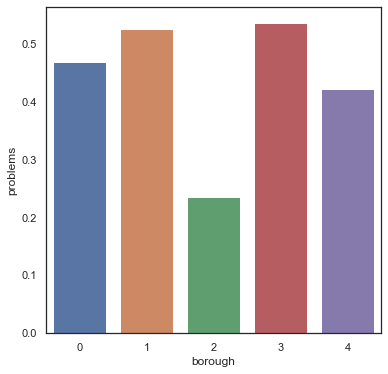

In [23]:
fig, (axis1) = plt.subplots(1,1,figsize=(6,6))

data_status = data[["problems","borough"]].groupby(['borough'],as_index=False).mean()

sns.barplot(x='borough', y='problems', data=data_status,order=[0,1,2,3,4],ax=axis1)

<AxesSubplot:xlabel='borough', ylabel='health'>

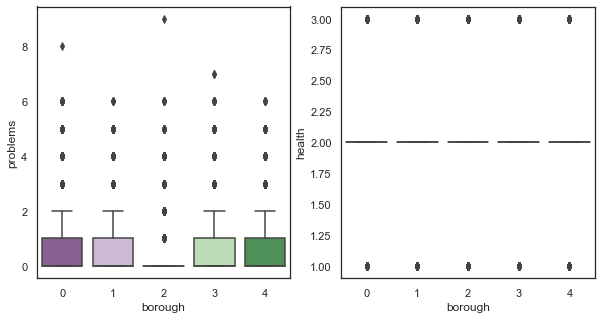

In [28]:
tips = data
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x = 'borough' , y = 'problems', data = tips ,palette="PRGn", ax = axis3)
sns.boxplot(x = 'borough' , y = 'health', data = tips ,palette="PRGn", ax = axis4)

По диаграмме размаха для каждого района - видим, что район с аномально хорошим состоянием деревьев - это Staten Island, а район с аномально плохим состоянием деревьев - это Brooklyn.

ЗАДАЧА 2. Выделить наилучший район по состоянию деревьев.

In [29]:
data.value_counts('borough')

borough
0    250551
3    177293
2    105318
4     85203
1     65423
dtype: int64

In [30]:
#Пройдем все районы и посмотрим на количство проблем у каждого дерева
data.groupby('borough')['problems'].sum()

borough
0    117581
1     34403
2     24795
3     95112
4     35975
Name: problems, dtype: int32

Расшифровка кода района:
Queens ->   0       
Brooklyn ->  3      
Staten Island ->2  
Bronx -> 4          
Manhattan -> 1      

Видим, что наилучший район по состоянию деревьев - это район Staten Island

ЗАДАЧА 3. Выделить виды деревьев (или более общие элементы классификации), обладающие наилучшими показателями «здоровья»

In [31]:
#У кажого вида выделяем общую сумму проблем и выбираем виды с наименьшим числом проблем
arr = []
arr = data.groupby('spc_latin')['problems'].sum()

for ind in range(133):
    if arr[ind] < 50:
        print(ind, arr[ind])

0 2
5 26
6 37
7 43
9 9
12 46
15 33
17 42
23 10
26 33
27 23
31 10
33 18
38 20
48 34
51 18
52 38
68 11
77 5
81 11
89 5
92 42
97 15
99 16
100 29
111 5
113 11
115 1
117 7
118 44
124 14
127 28
129 12


Расшифровка закодированных видов деревьев,чьи показатели здоровья наилучшие:
0 Tilia cordata 
5 Cotinus coggygria
6 Quercus alba
7 Ulmus pumila
9 Acer buergerianum
12 Acer nigrum
15 Pinus resinosa
17 Quercus rubra
23 Cornus florida
26 Carpinus betulus
27 Cedrus atlantica
31 Quercus velutina
33 Liquidambar styraciflua
38 Prunus virginiana 
48 Picea
51 Aesculus glabra
52 Fagus grandifolia 
68 Cornus mas
77 Magnolia grandiflora
81 Carya glabra
89 Acer tataricum
92 Syringa reticulata
97 Carpinus caroliniana
99 Chamaecyparis pisifera
100 Carpinus japonica 
111 Fraxinus pennsylvanica 
113 Pyrus calleryana
115 Crataegus
117 Acer negundo
118 Tsuga canadensis
124 Parrotia persica
127 Acer ginnala
129 Pinus